In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
immo = pd.read_csv('immo.csv')

In [3]:
pd.set_option('display.max_columns', None)
immo.head(1)

,Unnamed: 0,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,Euro/m2,price_class
0,0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,0.0,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.0,Dortmund,well_kept,normal,unknown,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,77.111,unknown,2009.1,89.11,0.21111,May19,6.92,4


In [4]:
cols = ['newlyConst', 'balcony', 'hasKitchen','lift', 'garden']
immo[cols] = immo[cols].replace({True:1,False:0})

In [5]:
immo.head(1)

,Unnamed: 0,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,Euro/m2,price_class
0,0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,0.0,0,0,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,0,Nordrhein_Westfalen,True,2.0,595.0,244,86.0,Dortmund,well_kept,normal,unknown,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,0,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,1,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,77.111,unknown,2009.1,89.11,0.21111,May19,6.92,4


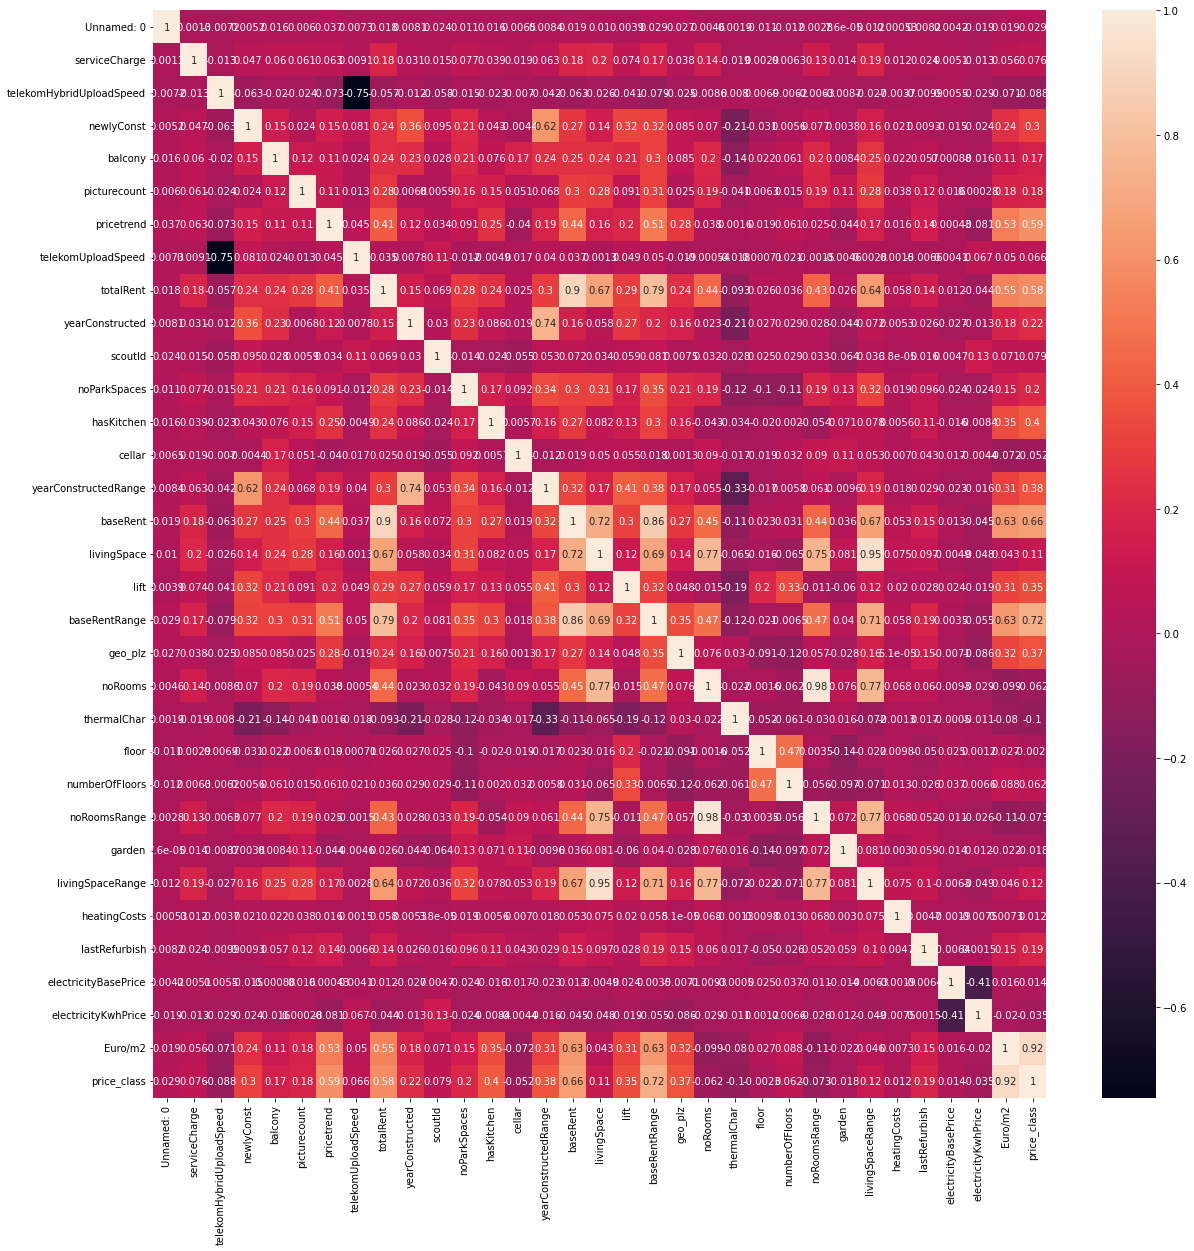

In [6]:
correlations_matrix = immo.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(correlations_matrix, annot=True)
plt.show()

### Linear Regression feature selection

In [7]:
x = immo[['serviceCharge', 'newlyConst', 'balcony', 'picturecount', 'totalRent', 'yearConstructed', 'noParkSpaces', 'hasKitchen', 'yearConstructedRange', 'baseRent', 'livingSpace', 'lift', 'geo_plz', 'lastRefurbish']].copy()
x.head(5)

,serviceCharge,newlyConst,balcony,picturecount,totalRent,yearConstructed,noParkSpaces,hasKitchen,yearConstructedRange,baseRent,livingSpace,lift,geo_plz,lastRefurbish
0,245.00,0,0,6,840.00,1965.0,1.0,0,2.0,595.0,86.00,0,44269,2009.1
1,134.00,0,1,8,814.11,1871.0,2.0,0,1.0,800.0,89.00,0,67459,2019.0
2,255.00,1,1,8,1300.00,2019.0,1.0,0,9.0,965.0,83.80,1,1097,2009.1
3,58.15,0,1,9,814.11,1964.0,0.0,0,2.0,343.0,58.15,0,9599,2009.1
4,138.00,0,1,19,903.00,1950.0,0.0,0,1.0,765.0,84.97,0,28213,2009.1


### Linear Regression target selection (Euro/m²)

In [8]:
y = immo[['Euro/m2']].copy()
y.head(5)

,Euro/m2
0,6.92
1,8.99
2,11.52
3,5.90
4,9.00


### Linear Regression train test split

In [9]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [10]:
print('train_X= ',train_X.shape)
print('test_X= ',test_X.shape)
print('train_Y= ',train_Y.shape)
print('test_Y= ',test_Y.shape)

train_X=  (214248, 14)
test_X=  (53562, 14)
train_Y=  (214248, 1)
test_Y=  (53562, 1)


In [11]:
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [12]:
regressor = LinearRegression()
regressor.fit(train_X,train_Y)

LinearRegression()

### Linear Regression R2-score

In [13]:
y_predict = regressor.predict(test_X)
r2_score(test_Y, y_predict)

0.7506221208359846

In [14]:
test_Y['predicted'] = y_predict.round(2)
test_Y['difference'] = ((test_Y['Euro/m2']-test_Y['predicted'])**2)**(1/2)
test_Y.head(5)

,Euro/m2,predicted,difference
204337,4.92,4.05,0.87
215731,6.42,8.38,1.96
168163,11.02,11.55,0.53
64568,4.58,3.24,1.34
267465,6.00,5.44,0.56


In [15]:
round(test_Y['difference'].mean(),2)

1.24

### Multi-class classification & Classification model

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
y = immo[['price_class']].copy()
X = immo[['serviceCharge', 'newlyConst', 'balcony', 'picturecount', 'totalRent', 'yearConstructed', 'noParkSpaces', 'hasKitchen', 'yearConstructedRange', 'baseRent', 'livingSpace', 'lift', 'geo_plz', 'lastRefurbish']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.head(1)

,serviceCharge,newlyConst,balcony,picturecount,totalRent,yearConstructed,noParkSpaces,hasKitchen,yearConstructedRange,baseRent,livingSpace,lift,geo_plz,lastRefurbish
50850,100.0,0,1,14,814.11,1895.0,0.0,1,1.0,590.0,79.0,0,99086,2009.1


In [18]:
y_train.head(1)

,price_class
50850,5


In [19]:
X_train_num = X_train[['serviceCharge','picturecount','totalRent','yearConstructed','noParkSpaces','yearConstructedRange',
                       'baseRent','livingSpace','geo_plz','lastRefurbish']]
X_train_cat = X_train[['newlyConst','balcony','hasKitchen','lift']]

In [20]:
# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [21]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,serviceCharge,picturecount,totalRent,yearConstructed,noParkSpaces,yearConstructedRange,baseRent,livingSpace,geo_plz,lastRefurbish
0,0.000684,0.115702,0.072667,0.876592,0.00,0.000,0.052050,0.110764,0.990801,0.842029
1,0.000845,0.008264,0.027106,0.944172,0.00,0.125,0.015930,0.064290,0.075011,0.842029
2,0.001369,0.115702,0.097081,0.998041,0.25,1.000,0.079712,0.135725,0.862657,0.842029
3,0.001027,0.074380,0.104637,0.998041,0.25,1.000,0.092798,0.095944,0.654671,0.842029
4,0.001164,0.008264,0.071725,0.993144,0.00,0.875,0.056830,0.075959,0.173512,0.842029


In [22]:
X_train_cat = pd.get_dummies(X_train_cat, columns=['newlyConst','balcony','hasKitchen','lift'],drop_first=True)
X_train_cat.head()

,newlyConst_1,balcony_1,hasKitchen_1,lift_1
50850,0,1,1,0
17253,0,1,0,0
217025,1,1,0,0
151326,1,1,0,1
177498,0,0,0,0


In [23]:
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset
from sklearn.compose import make_column_transformer

encoder = OneHotEncoder(drop='first').fit(X_train_cat) 
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
display(X_train_cat_encode.head())
X_train_cat_encode.shape

,newlyConst_1_1,balcony_1_1,hasKitchen_1_1,lift_1_1
0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0


(214248, 4)

In [24]:
X_train_transformed = pd.concat([X_train_norm, X_train_cat_encode], axis=1)
X_train_transformed

,serviceCharge,picturecount,totalRent,yearConstructed,noParkSpaces,yearConstructedRange,baseRent,livingSpace,geo_plz,lastRefurbish,newlyConst_1_1,balcony_1_1,hasKitchen_1_1,lift_1_1
0,0.000684,0.115702,0.072667,0.876592,0.00,0.0000,0.052050,0.110764,0.990801,0.842029,0.0,1.0,1.0,0.0
1,0.000845,0.008264,0.027106,0.944172,0.00,0.1250,0.015930,0.064290,0.075011,0.842029,0.0,1.0,0.0,0.0
2,0.001369,0.115702,0.097081,0.998041,0.25,1.0000,0.079712,0.135725,0.862657,0.842029,1.0,1.0,0.0,0.0
3,0.001027,0.074380,0.104637,0.998041,0.25,1.0000,0.092798,0.095944,0.654671,0.842029,1.0,1.0,0.0,1.0
4,0.001164,0.008264,0.071725,0.993144,0.00,0.8750,0.056830,0.075959,0.173512,0.842029,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214243,0.001163,0.066116,0.095011,0.953967,0.25,0.2500,0.080776,0.159126,0.863232,0.855072,0.0,0.0,0.0,0.0
214244,0.001779,0.066116,0.160215,0.848188,0.25,0.0000,0.138227,0.133385,0.610171,0.842029,0.0,0.0,1.0,0.0
214245,0.001574,0.082645,0.120472,0.997062,0.25,1.0000,0.100565,0.133089,0.004609,0.842029,1.0,1.0,0.0,1.0
214246,0.000602,0.024793,0.072667,0.950049,0.00,0.1250,0.043190,0.095367,0.219242,0.842029,0.0,1.0,1.0,0.0


In [25]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=42, solver='lbfgs',
                  multi_class='auto', max_iter=1000).fit(X_train_transformed, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
X_test_num = X_test[['serviceCharge','picturecount','totalRent','yearConstructed','noParkSpaces','yearConstructedRange',
                       'baseRent','livingSpace','geo_plz','lastRefurbish']]
X_test_cat = X_test[['newlyConst','balcony','hasKitchen','lift']]
# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [27]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat) 

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)
display(X_test_cat_encode.head())
X_test_cat_encode.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- balcony
- hasKitchen
- lift
- newlyConst
Feature names seen at fit time, yet now missing:
- balcony_1
- hasKitchen_1
- lift_1
- newlyConst_1

  warnings.warn(message, FutureWarning)


,newlyConst_1_1,balcony_1_1,hasKitchen_1_1,lift_1_1
0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0
2,0.0,1.0,1.0,1.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0


(53562, 4)

In [28]:
X_test_norm.columns = X_test_num.columns
X_test_transformed = pd.concat([X_test_norm, X_test_cat_encode], axis=1)
X_test_transformed.head(5)

,serviceCharge,picturecount,totalRent,yearConstructed,noParkSpaces,yearConstructedRange,baseRent,livingSpace,geo_plz,lastRefurbish,newlyConst_1_1,balcony_1_1,hasKitchen_1_1,lift_1_1
0,0.001054,0.132231,0.045746,0.852106,0.0,0.0000,0.031836,0.114353,0.037803,0.666667,0.0,0.0,0.0,0.0
1,0.000205,0.082645,0.025564,0.953085,0.0,0.3875,0.020026,0.057722,0.019910,0.842029,0.0,0.0,1.0,1.0
2,0.001369,0.165289,0.083627,0.992165,0.0,0.8750,0.060029,0.081622,0.205676,0.842029,0.0,1.0,1.0,1.0
3,0.001232,0.057851,0.052060,0.886386,0.0,0.0000,0.035559,0.135725,0.077411,0.842029,0.0,1.0,0.0,1.0
4,0.001122,0.107438,0.052577,0.881489,0.0,0.0000,0.037794,0.106084,0.009652,0.869565,0.0,1.0,0.0,0.0


### Classification Score

In [29]:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

0.3920129942869945

In [30]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test, predictions)

### KNeighbors Classifier-Score

In [31]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train_transformed, y_train)
predictions_clf = clf.predict(X_test_transformed)
clf.score(X_test_transformed, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.3985848175945633

In [32]:
y_test['predicted'] = predictions_clf

In [33]:
y_test['difference'] = ((y_test['price_class']-y_test['predicted'])**2)**(1/2)

In [34]:
y_test.head(5)

,price_class,predicted,difference
204337,2,2,0.0
215731,4,5,1.0
168163,8,9,1.0
64568,2,2,0.0
267465,3,3,0.0


In [35]:
y_test['difference'].value_counts()

0.0     21349
1.0     20209
2.0      7053
3.0      2854
4.0      1246
5.0       507
6.0       207
7.0        87
8.0        33
9.0        12
10.0        3
12.0        1
13.0        1
Name: difference, dtype: int64

In [36]:
round(y_test['difference'].mean(),2)

0.98

# New Features

### Type of Flat

Text(0, 0.5, 'baseRent')

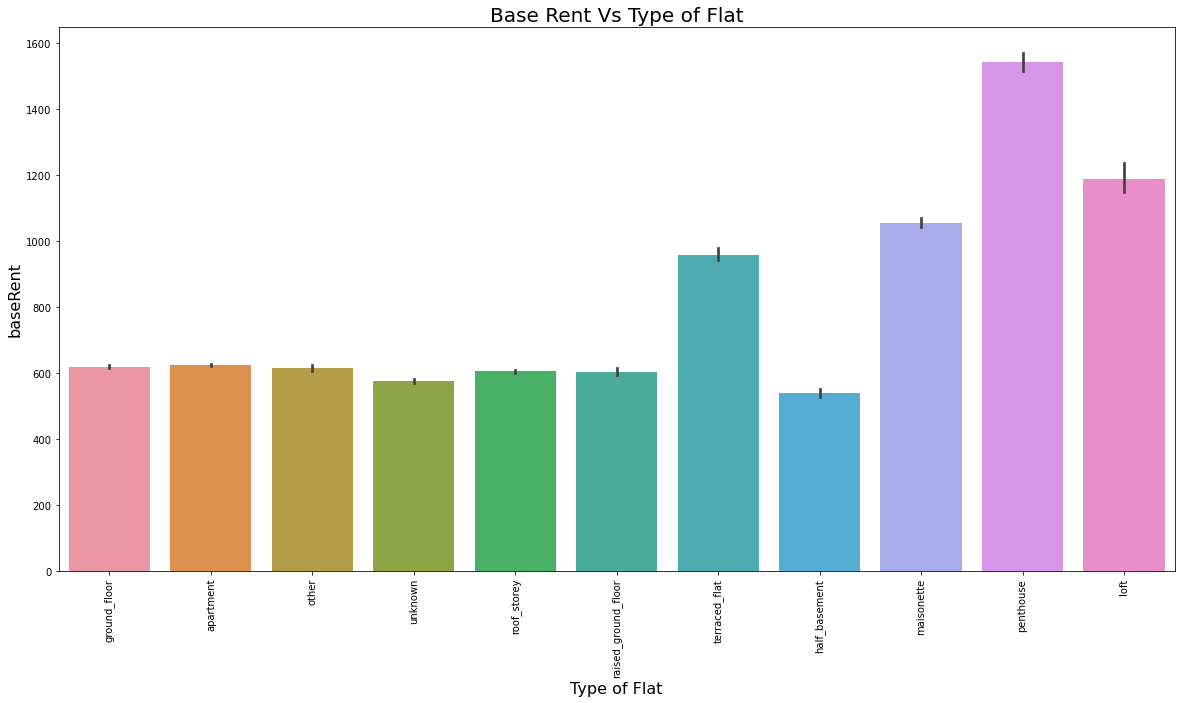

In [37]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'typeOfFlat', y = 'baseRent', data = immo)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Type of Flat', fontsize = 20)
plt.xlabel('Type of Flat', fontsize = 16)
plt.ylabel('baseRent', fontsize = 16)

In [38]:
immo["typeOfFlat"].value_counts(dropna=False).head(11)

apartment              130989
unknown                 36446
roof_storey             34685
ground_floor            31442
other                    9432
maisonette               9304
raised_ground_floor      5619
penthouse                3555
terraced_flat            3381
half_basement            2005
loft                      952
Name: typeOfFlat, dtype: int64

In [39]:
# building 3 price categories based on plot above

In [40]:
immo['typeOfFlat_cat'] = immo['typeOfFlat']
immo.loc[immo['typeOfFlat_cat'] == 'ground_floor', 'typeOfFlat_cat'] = 0.4
immo.loc[immo['typeOfFlat_cat'] == 'apartment', 'typeOfFlat_cat'] = 0.4
immo.loc[immo['typeOfFlat_cat'] == 'other', 'typeOfFlat_cat'] = 0.4
immo.loc[immo['typeOfFlat_cat'] == 'unknown', 'typeOfFlat_cat'] = 0.4
immo.loc[immo['typeOfFlat_cat'] == 'roof_storey', 'typeOfFlat_cat'] = 0.4
immo.loc[immo['typeOfFlat_cat'] == 'raised_ground_floor', 'typeOfFlat_cat'] = 0.4
immo.loc[immo['typeOfFlat_cat'] == 'half_basement', 'typeOfFlat_cat'] = 0.4
immo.loc[immo['typeOfFlat_cat'] == 'terraced_flat', 'typeOfFlat_cat'] = 0.7
immo.loc[immo['typeOfFlat_cat'] == 'maisonette', 'typeOfFlat_cat'] = 0.7
immo.loc[immo['typeOfFlat_cat'] == 'loft', 'typeOfFlat_cat'] = 0.7
immo.loc[immo['typeOfFlat_cat'] == 'penthouse', 'typeOfFlat_cat'] = 1.0

In [41]:
immo["typeOfFlat_cat"].value_counts(dropna=False).head(15)

0.4    250618
0.7     13637
1.0      3555
Name: typeOfFlat_cat, dtype: int64

### Heating Type

In [42]:
immo["heatingType"].value_counts(dropna=False).head(15)

central_heating                   128430
unknown                            44645
district_heating                   24736
gas_heating                        19905
self_contained_central_heating     19019
floor_heating                      17650
oil_heating                         5031
heat_pump                           2728
combined_heat_and_power_plant       1976
night_storage_heater                1331
wood_pellet_heating                  960
electric_heating                     895
stove_heating                        339
solar_heating                        165
Name: heatingType, dtype: int64

Text(0, 0.5, 'Base Rent')

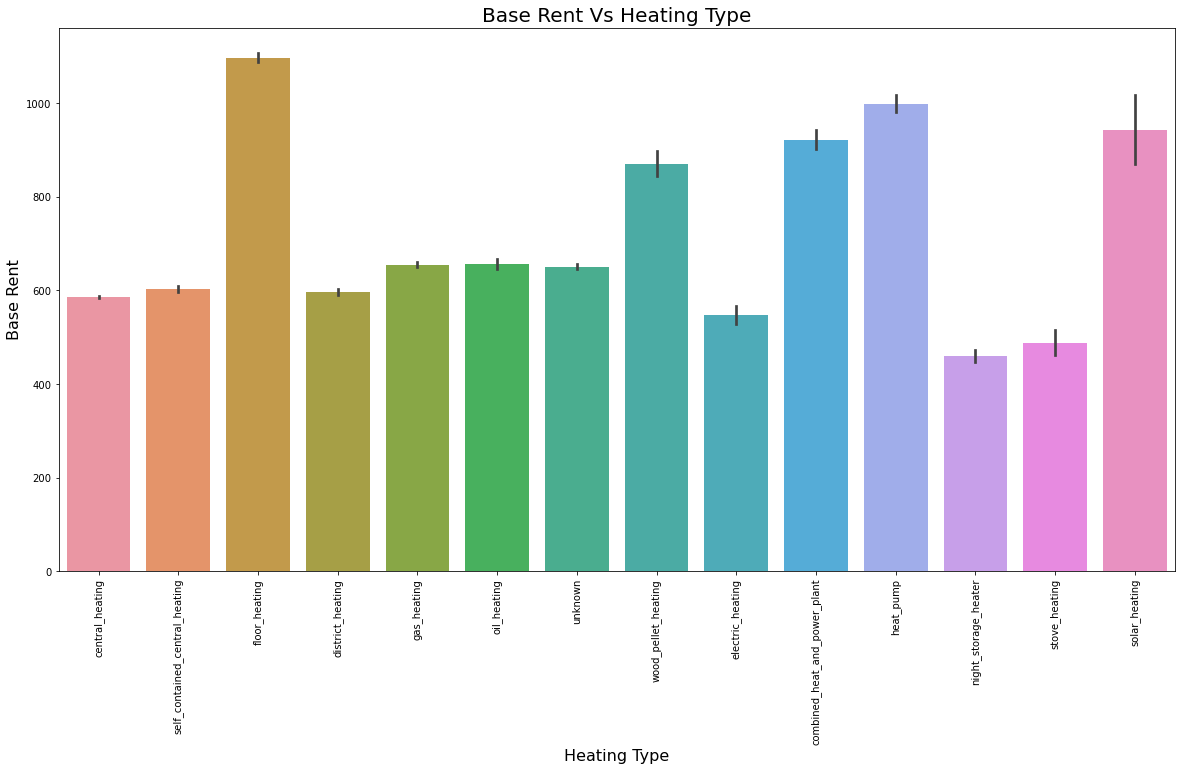

In [43]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'heatingType', y = 'baseRent', data = immo)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Heating Type', fontsize = 20)
plt.xlabel('Heating Type', fontsize = 16)
plt.ylabel('Base Rent', fontsize = 16)

In [44]:
# building 3 price categories based on plot above

In [45]:
immo['heatingType_cat'] = immo['heatingType']
immo.loc[immo['heatingType_cat'] == 'central_heating', 'heatingType_cat'] = 0.55
immo.loc[immo['heatingType_cat'] == 'self_contained_central_heating', 'heatingType_cat'] = 0.55
immo.loc[immo['heatingType_cat'] == 'district_heating', 'heatingType_cat'] = 0.55
immo.loc[immo['heatingType_cat'] == 'gas_heating', 'heatingType_cat'] = 0.55
immo.loc[immo['heatingType_cat'] == 'oil_heating', 'heatingType_cat'] = 0.55
immo.loc[immo['heatingType_cat'] == 'unknown', 'heatingType_cat'] = 0.55
immo.loc[immo['heatingType_cat'] == 'electric_heating', 'heatingType_cat'] = 0.55
immo.loc[immo['heatingType_cat'] == 'night_storage_heater', 'heatingType_cat'] = 0.55
immo.loc[immo['heatingType_cat'] == 'stove_heating', 'heatingType_cat'] = 0.55
immo.loc[immo['heatingType_cat'] == 'wood_pellet_heating', 'heatingType_cat'] = 0.80
immo.loc[immo['heatingType_cat'] == 'combined_heat_and_power_plant', 'heatingType_cat'] = 0.80
immo.loc[immo['heatingType_cat'] == 'heat_pump', 'heatingType_cat'] = 0.80
immo.loc[immo['heatingType_cat'] == 'solar_heating', 'heatingType_cat'] = 0.80
immo.loc[immo['heatingType_cat'] == 'floor_heating', 'heatingType_cat'] = 1.00

In [46]:
immo["heatingType_cat"].value_counts(dropna=False).head(15)

0.55    244331
1.00     17650
0.80      5829
Name: heatingType_cat, dtype: int64

### firing Types

In [47]:
immo["firingTypes"].value_counts(dropna=False).head(25)

gas                                         127968
unknown                                      56578
district_heating                             50611
oil                                          19163
electricity                                   5286
pellet_heating                                2470
geothermal                                    2451
local_heating                                  929
environmental_thermal_energy                   900
solar                                          529
wood                                           372
combined_heat_and_power_renewable_energy       278
bio_energy                                     146
coal                                            62
hydro_energy                                    52
wind_energy                                     15
Name: firingTypes, dtype: int64

Text(0, 0.5, 'Base Rent')

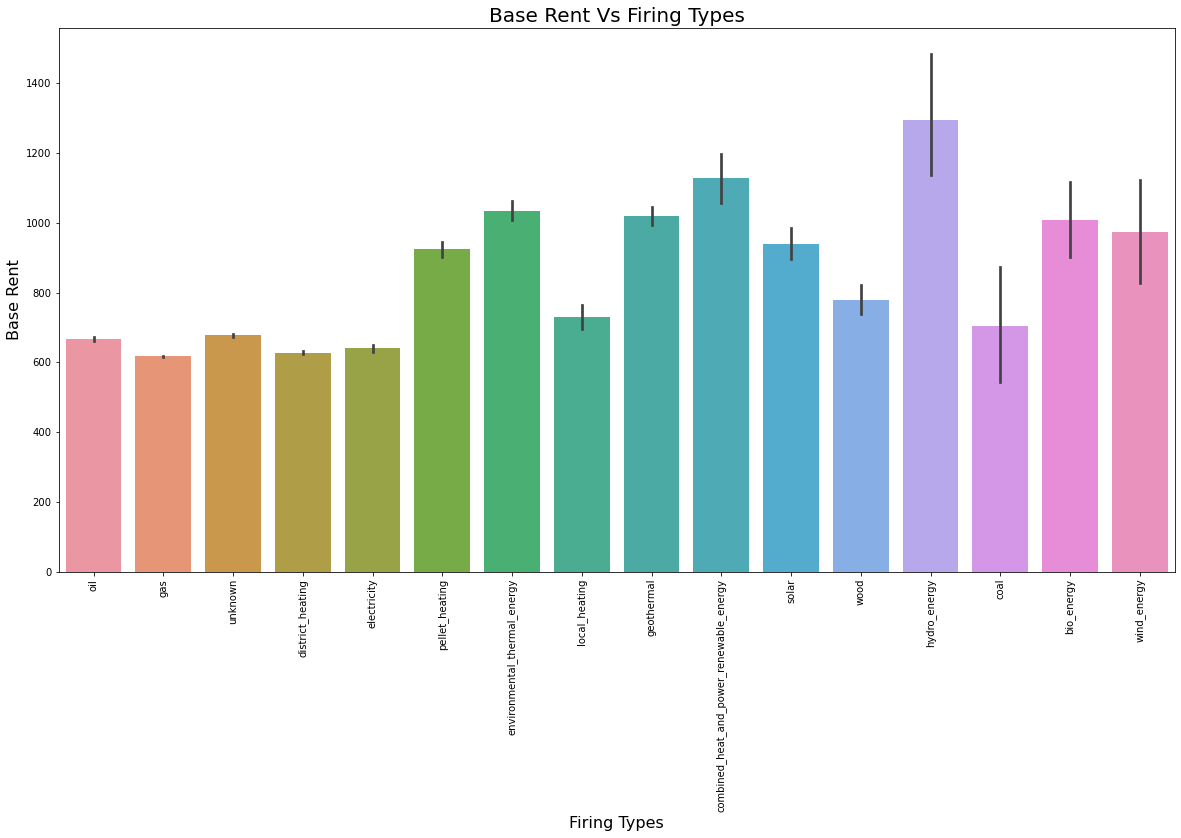

In [48]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'firingTypes', y = 'baseRent', data = immo)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Firing Types', fontsize = 20)
plt.xlabel('Firing Types', fontsize = 16)
plt.ylabel('Base Rent', fontsize = 16)

In [49]:
# building 3 price categories based on plot above

In [50]:
immo['firingTypes_cat'] = immo['firingTypes']
immo.loc[immo['firingTypes_cat'] == 'oil', 'firingTypes_cat'] = 0.45
immo.loc[immo['firingTypes_cat'] == 'gas', 'firingTypes_cat'] = 0.45
immo.loc[immo['firingTypes_cat'] == 'unknown', 'firingTypes_cat'] = 0.45
immo.loc[immo['firingTypes_cat'] == 'district_heating', 'firingTypes_cat'] = 0.45
immo.loc[immo['firingTypes_cat'] == 'electricity', 'firingTypes_cat'] = 0.45
immo.loc[immo['firingTypes_cat'] == 'local_heating', 'firingTypes_cat'] = 0.45
immo.loc[immo['firingTypes_cat'] == 'wood', 'firingTypes_cat'] = 0.45
immo.loc[immo['firingTypes_cat'] == 'coal', 'firingTypes_cat'] = 0.45
immo.loc[immo['firingTypes_cat'] == 'pellet_heating', 'firingTypes_cat'] = 0.70
immo.loc[immo['firingTypes_cat'] == 'environmental_thermal_energy', 'firingTypes_cat'] = 0.70
immo.loc[immo['firingTypes_cat'] == 'geothermal', 'firingTypes_cat'] = 0.70
immo.loc[immo['firingTypes_cat'] == 'combined_heat_and_power_renewable_energy', 'firingTypes_cat'] = 0.70
immo.loc[immo['firingTypes_cat'] == 'solar', 'firingTypes_cat'] = 0.70
immo.loc[immo['firingTypes_cat'] == 'bio_energy', 'firingTypes_cat'] = 0.70
immo.loc[immo['firingTypes_cat'] == 'wind_energy', 'firingTypes_cat'] = 0.70
immo.loc[immo['firingTypes_cat'] == 'hydro_energy', 'firingTypes_cat'] = 1.00

In [51]:
immo["firingTypes_cat"].value_counts(dropna=False).head(25)

0.45    260969
0.70      6789
1.00        52
Name: firingTypes_cat, dtype: int64

### Federal State

Text(0, 0.5, 'baseRent')

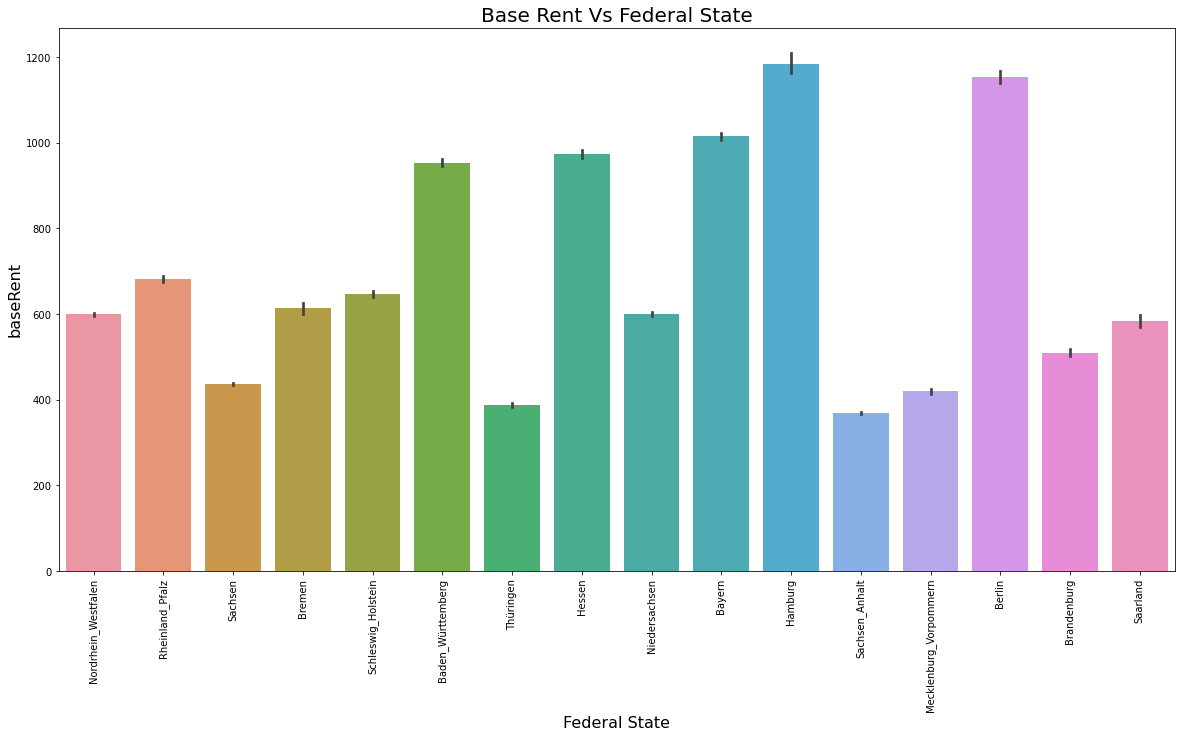

In [52]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'regio1', y = 'baseRent', data = immo)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Federal State', fontsize = 20)
plt.xlabel('Federal State', fontsize = 16)
plt.ylabel('baseRent', fontsize = 16)

In [53]:
state = immo['regio1'].unique()
for x in state:
    print(x,":")
    state_1 = immo.loc[immo['regio1'].str.contains(x, case=False)]
    state_hamburg = immo.loc[immo['regio1'].str.contains('Hamburg', case=False)]
    mean = round(state_1['baseRent'].mean(),2)
    mean_hamburg = round(state_hamburg['baseRent'].mean(),2)
    value = round(mean/mean_hamburg,2)
    print(value)

Nordrhein_Westfalen :
0.51
Rheinland_Pfalz :
0.58
Sachsen :
0.38
Bremen :
0.52
Schleswig_Holstein :
0.55
Baden_Württemberg :
0.81
Thüringen :
0.33
Hessen :
0.82
Niedersachsen :
0.51
Bayern :
0.86
Hamburg :
1.0
Sachsen_Anhalt :
0.31
Mecklenburg_Vorpommern :
0.35
Berlin :
0.97
Brandenburg :
0.43
Saarland :
0.49


In [54]:
# building 16 price categories based on plot above

In [55]:
immo['regio1_cat'] = immo['regio1']
immo.loc[immo['regio1_cat'] == 'Nordrhein_Westfalen', 'regio1_cat'] = 0.51
immo.loc[immo['regio1_cat'] == 'Rheinland_Pfalz', 'regio1_cat'] = 0.58
immo.loc[immo['regio1_cat'] == 'Sachsen', 'regio1_cat'] = 0.38
immo.loc[immo['regio1_cat'] == 'Bremen', 'regio1_cat'] = 0.52
immo.loc[immo['regio1_cat'] == 'Schleswig_Holstein', 'regio1_cat'] = 0.55
immo.loc[immo['regio1_cat'] == 'Baden_Württemberg', 'regio1_cat'] = 0.81
immo.loc[immo['regio1_cat'] == 'Thüringen', 'regio1_cat'] = 0.33
immo.loc[immo['regio1_cat'] == 'Hessen', 'regio1_cat'] = 0.82
immo.loc[immo['regio1_cat'] == 'Niedersachsen', 'regio1_cat'] = 0.51
immo.loc[immo['regio1_cat'] == 'Bayern', 'regio1_cat'] = 0.86
immo.loc[immo['regio1_cat'] == 'Hamburg', 'regio1_cat'] = 1.00
immo.loc[immo['regio1_cat'] == 'Sachsen_Anhalt', 'regio1_cat'] = 0.31
immo.loc[immo['regio1_cat'] == 'Mecklenburg_Vorpommern', 'regio1_cat'] = 0.35
immo.loc[immo['regio1_cat'] == 'Berlin', 'regio1_cat'] = 0.97
immo.loc[immo['regio1_cat'] == 'Brandenburg', 'regio1_cat'] = 0.43
immo.loc[immo['regio1_cat'] == 'Saarland', 'regio1_cat'] = 0.49

In [56]:
immo["regio1_cat"].value_counts(dropna=False).head(16)

0.51    79206
0.38    57946
0.86    21457
0.31    20085
0.82    17739
0.81    15994
0.97    10327
0.33     8370
0.58     8356
0.43     6933
0.55     6651
0.35     6621
1.00     3747
0.52     2960
0.49     1418
Name: regio1_cat, dtype: int64

### condition

Text(0, 0.5, 'baseRent')

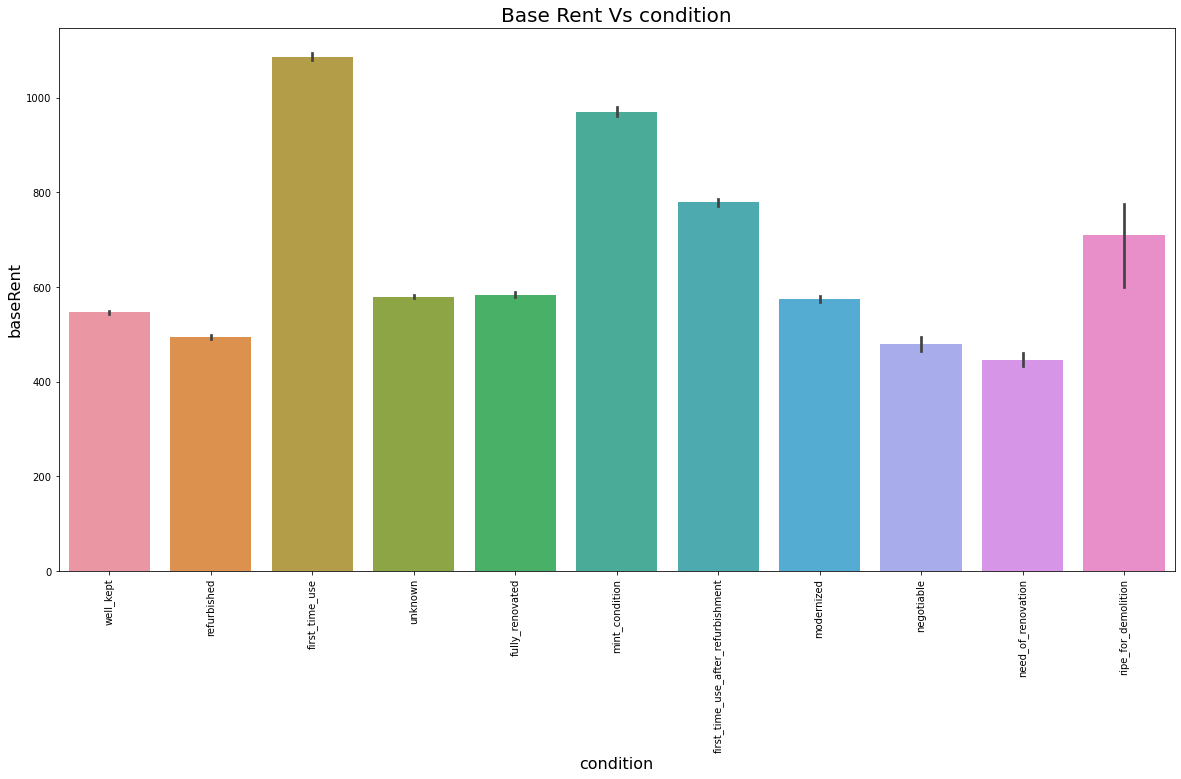

In [57]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'condition', y = 'baseRent', data = immo)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs condition', fontsize = 20)
plt.xlabel('condition', fontsize = 16)
plt.ylabel('baseRent', fontsize = 16)

In [58]:
immo["condition"].value_counts(dropna=False).head(16)

unknown                               68144
well_kept                             66409
refurbished                           26918
fully_renovated                       26302
first_time_use                        21885
mint_condition                        21857
modernized                            17044
first_time_use_after_refurbishment    15655
negotiable                             2234
need_of_renovation                     1359
ripe_for_demolition                       3
Name: condition, dtype: int64

In [59]:
cond = immo['condition'].unique()
for x in cond:
    print(x,":")
    con_1 = immo.loc[immo['condition'].str.contains(x, case=False)]
    con_mint = immo.loc[immo['condition'].str.contains('first_time_use', case=False)]
    mean = round(con_1['baseRent'].mean(),2)
    mean_mint = round(con_mint['baseRent'].mean(),2)
    value = round(mean/mean_mint,2)
    print(value)

well_kept :
0.57
refurbished :
0.52
first_time_use :
1.0
unknown :
0.61
fully_renovated :
0.61
mint_condition :
1.01
first_time_use_after_refurbishment :
0.81
modernized :
0.6
negotiable :
0.5
need_of_renovation :
0.46
ripe_for_demolition :
0.74


In [60]:
immo['condition_cat'] = immo['condition']
immo.loc[immo['condition_cat'] == 'well_kept', 'condition_cat'] = 0.57
immo.loc[immo['condition_cat'] == 'refurbished', 'condition_cat'] = 0.52
immo.loc[immo['condition_cat'] == 'first_time_use', 'condition_cat'] = 1.00
immo.loc[immo['condition_cat'] == 'unknown', 'condition_cat'] = 0.61
immo.loc[immo['condition_cat'] == 'fully_renovated', 'condition_cat'] = 0.61
immo.loc[immo['condition_cat'] == 'mint_condition', 'condition_cat'] = 1.00
immo.loc[immo['condition_cat'] == 'first_time_use_after_refurbishment', 'condition_cat'] = 0.81
immo.loc[immo['condition_cat'] == 'modernized', 'condition_cat'] = 0.60
immo.loc[immo['condition_cat'] == 'negotiable', 'condition_cat'] = 0.50
immo.loc[immo['condition_cat'] == 'need_of_renovation', 'condition_cat'] = 0.46
immo.loc[immo['condition_cat'] == 'ripe_for_demolition', 'condition_cat'] = 0.74

### interior Quality

Text(0, 0.5, 'Base Rent')

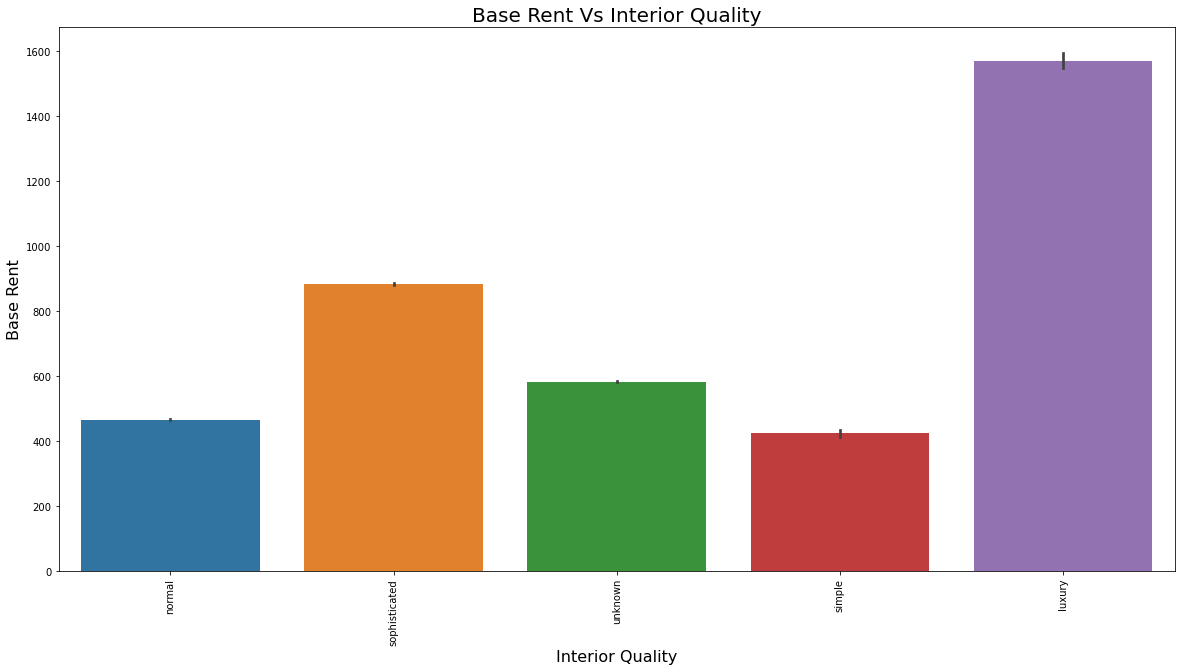

In [61]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'interiorQual', y = 'baseRent', data = immo)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Interior Quality', fontsize = 20)
plt.xlabel('Interior Quality', fontsize = 16)
plt.ylabel('Base Rent', fontsize = 16)

In [62]:
int = immo['interiorQual'].unique()
for x in int:
    print(x,":")
    int_1 = immo.loc[immo['interiorQual'].str.contains(x, case=False)]
    int_lux = immo.loc[immo['interiorQual'].str.contains('luxury', case=False)]
    mean = round(int_1['baseRent'].mean(),2)
    mean_lux = round(int_lux['baseRent'].mean(),2)
    value = round(mean/mean_lux,2)
    print(value)

normal :
0.3
sophisticated :
0.56
unknown :
0.37
simple :
0.27
luxury :
1.0


In [63]:
# building 5 price categories based on plot above

In [64]:
immo['interiorQual_cat'] = immo['interiorQual']
immo.loc[immo['interiorQual_cat'] == 'normal', 'interiorQual_cat'] = 0.30
immo.loc[immo['interiorQual_cat'] == 'sophisticated', 'interiorQual_cat'] = 0.56
immo.loc[immo['interiorQual_cat'] == 'unknown', 'interiorQual_cat'] = 0.37
immo.loc[immo['interiorQual_cat'] == 'simple', 'interiorQual_cat'] = 0.27
immo.loc[immo['interiorQual_cat'] == 'luxury', 'interiorQual_cat'] = 1.00

In [65]:
immo["interiorQual_cat"].value_counts(dropna=False).head(16)

0.37    112194
0.30     81639
0.56     64428
1.00      7605
0.27      1944
Name: interiorQual_cat, dtype: int64

### Pets allowed

Text(0, 0.5, 'Base Rent')

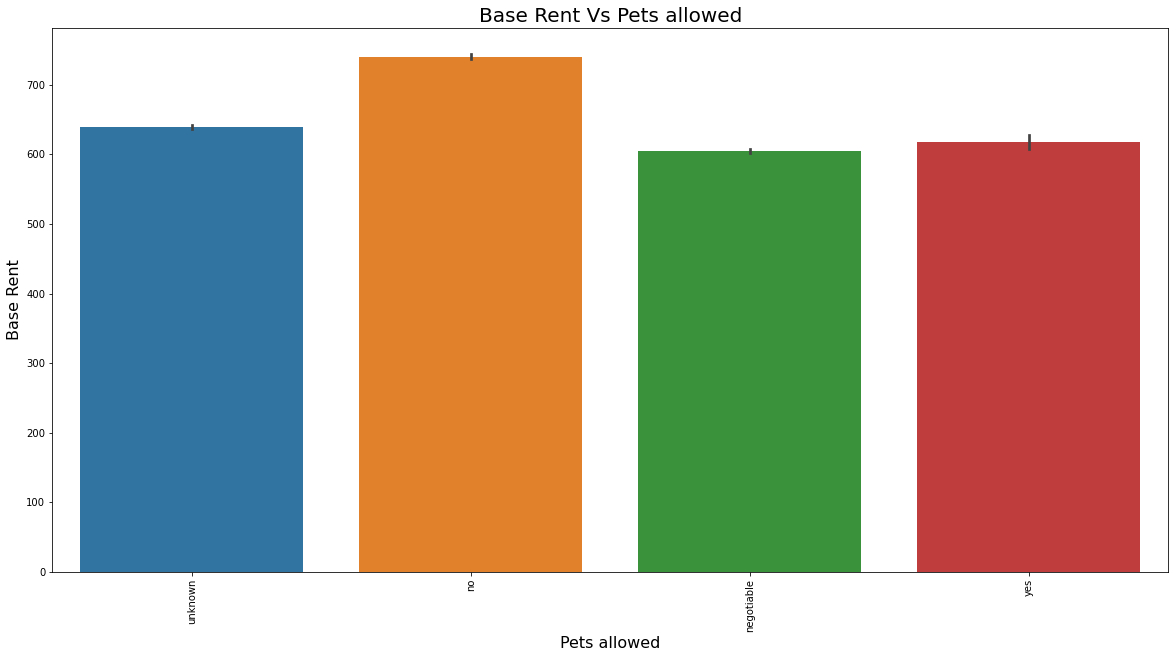

In [66]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'petsAllowed', y = 'baseRent', data = immo)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Pets allowed', fontsize = 20)
plt.xlabel('Pets allowed', fontsize = 16)
plt.ylabel('Base Rent', fontsize = 16)

In [67]:
int = immo['petsAllowed'].unique()
for x in int:
    print(x,":")
    int_1 = immo.loc[immo['petsAllowed'].str.contains(x, case=False)]
    int_lux = immo.loc[immo['petsAllowed'].str.contains('no', case=False)]
    mean = round(int_1['baseRent'].mean(),2)
    mean_lux = round(int_lux['baseRent'].mean(),2)
    value = round(mean/mean_lux,2)
    print(value)

unknown :
0.95
no :
1.0
negotiable :
0.9
yes :
0.92


In [68]:
immo['petsAllowed_cat'] = immo['petsAllowed']
immo.loc[immo['petsAllowed_cat'] == 'unknown', 'petsAllowed_cat'] = 0.95
immo.loc[immo['petsAllowed_cat'] == 'no', 'petsAllowed_cat'] = 1.00
immo.loc[immo['petsAllowed_cat'] == 'negotiable', 'petsAllowed_cat'] = 0.90
immo.loc[immo['petsAllowed_cat'] == 'yes', 'petsAllowed_cat'] = 0.92

In [69]:
immo["petsAllowed_cat"].value_counts(dropna=False).head(16)

0.95    114125
0.90     91730
1.00     51677
0.92     10278
Name: petsAllowed_cat, dtype: int64

### Number of Rooms range

Text(0, 0.5, 'Base Rent')

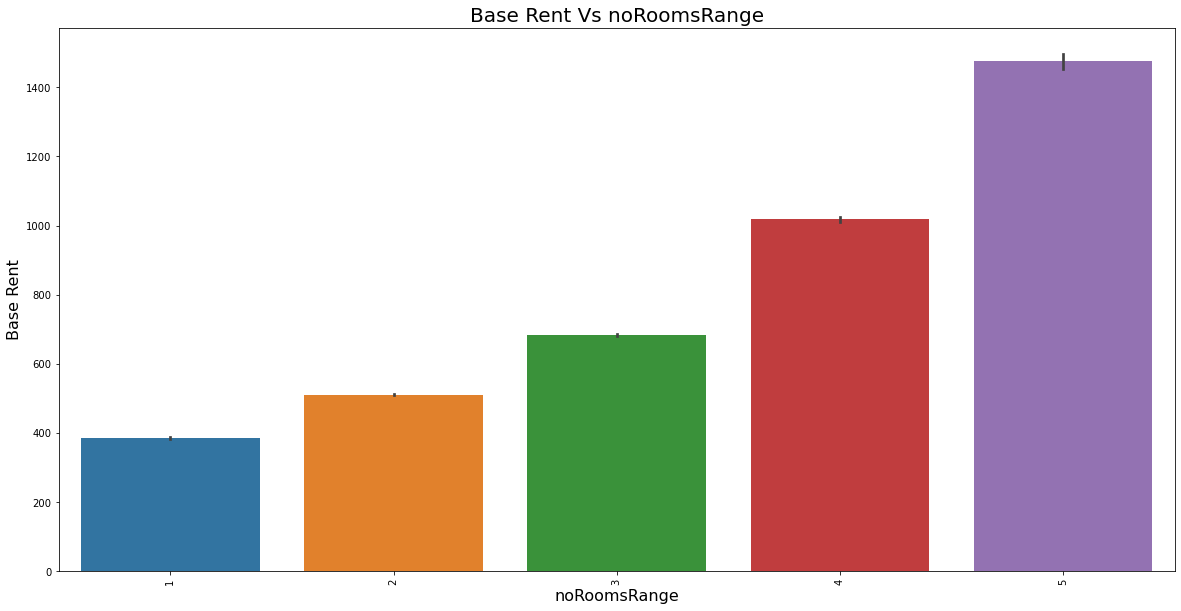

In [70]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'noRoomsRange', y = 'baseRent', data = immo)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs noRoomsRange', fontsize = 20)
plt.xlabel('noRoomsRange', fontsize = 16)
plt.ylabel('Base Rent', fontsize = 16)

In [71]:
#immo = immo.astype({'noRoomsRange':'string'})
#immo["petsAllowed"]=immo["petsAllowed"].values.astype('string')

pet = immo['noRoomsRange'].unique()
for x in pet:
    print(x,":")
    pet_1 = immo.loc[immo['noRoomsRange']==x]
    pet_5 = immo.loc[immo['noRoomsRange']==5]
    mean = round(pet_1['baseRent'].mean(),2)
    mean_lux = round(pet_5['baseRent'].mean(),2)
    value = round(mean/mean_lux,2)
    print(value)

4 :
0.69
3 :
0.46
2 :
0.35
1 :
0.26
5 :
1.0


In [72]:
immo['noRoomsRange_cat'] = immo['noRoomsRange']
immo.loc[immo['noRoomsRange_cat'] == '4', 'noRoomsRange_cat'] = 0.69
immo.loc[immo['noRoomsRange_cat'] == '3', 'noRoomsRange_cat'] = 0.46
immo.loc[immo['noRoomsRange_cat'] == '2', 'noRoomsRange_cat'] = 0.35
immo.loc[immo['noRoomsRange_cat'] == '1', 'noRoomsRange_cat'] = 0.26
immo.loc[immo['noRoomsRange_cat'] == '5', 'noRoomsRange_cat'] = 1.00

In [73]:
immo["noRoomsRange_cat"].value_counts(dropna=False).head(16)

3.0    100758
2.0     98487
1.0     30814
4.0     29772
5.0      7979
Name: noRoomsRange_cat, dtype: int64

### energy Efficiency Class

Text(0, 0.5, 'Base Rent')

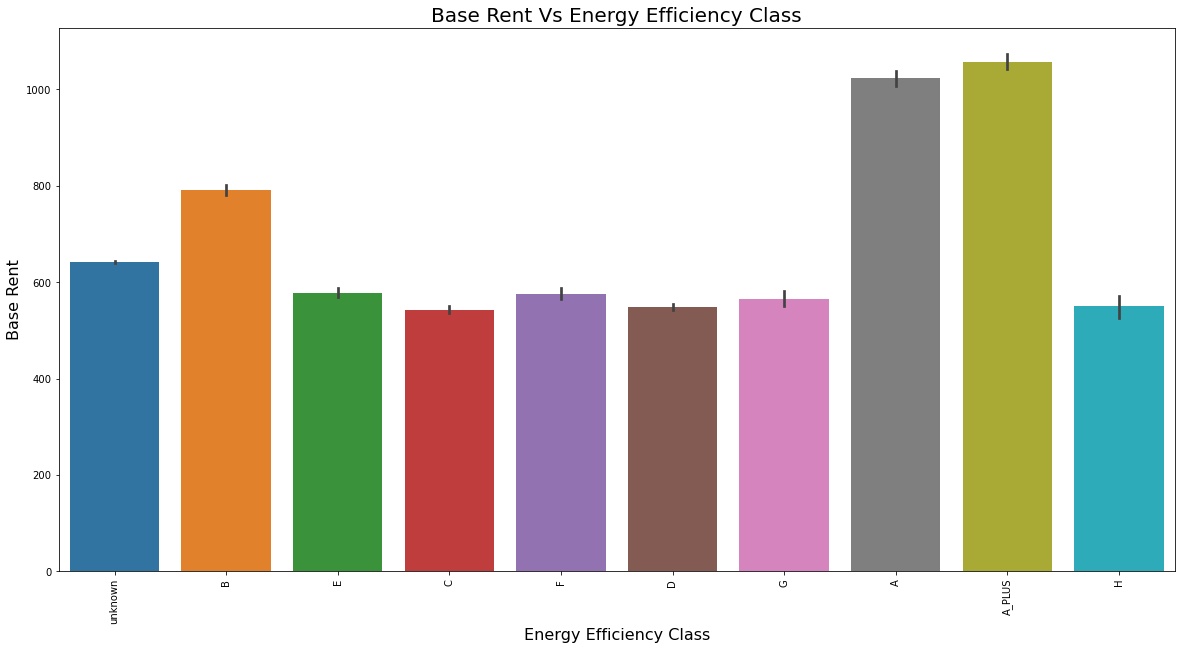

In [74]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'energyEfficiencyClass', y = 'baseRent', data = immo)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Energy Efficiency Class', fontsize = 20)
plt.xlabel('Energy Efficiency Class', fontsize = 16)
plt.ylabel('Base Rent', fontsize = 16)

In [75]:
int = immo['energyEfficiencyClass'].unique()
for x in int:
    print(x,":")
    int_1 = immo.loc[immo['energyEfficiencyClass'].str.contains(x, case=False)]
    int_lux = immo.loc[immo['energyEfficiencyClass'].str.contains('A_PLUS', case=False)]
    mean = round(int_1['baseRent'].mean(),2)
    mean_lux = round(int_lux['baseRent'].mean(),2)
    value = round(mean/mean_lux,2)
    print(value)

unknown :
0.61
B :
0.75
E :
0.55
C :
0.51
F :
0.54
D :
0.52
G :
0.53
A :
0.98
A_PLUS :
1.0
H :
0.52


In [76]:
immo['energyEfficiencyClass_cat'] = immo['energyEfficiencyClass']
immo.loc[immo['energyEfficiencyClass_cat'] == 'unknown', 'energyEfficiencyClass_cat'] = 0.61
immo.loc[immo['energyEfficiencyClass_cat'] == 'B', 'energyEfficiencyClass_cat'] = 0.75
immo.loc[immo['energyEfficiencyClass_cat'] == 'E', 'energyEfficiencyClass_cat'] = 0.55
immo.loc[immo['energyEfficiencyClass_cat'] == 'C', 'energyEfficiencyClass_cat'] = 0.51
immo.loc[immo['energyEfficiencyClass_cat'] == 'F', 'energyEfficiencyClass_cat'] = 0.54
immo.loc[immo['energyEfficiencyClass_cat'] == 'D', 'energyEfficiencyClass_cat'] = 0.52
immo.loc[immo['energyEfficiencyClass_cat'] == 'G', 'energyEfficiencyClass_cat'] = 0.53
immo.loc[immo['energyEfficiencyClass_cat'] == 'A', 'energyEfficiencyClass_cat'] = 0.98
immo.loc[immo['energyEfficiencyClass_cat'] == 'A_PLUS', 'energyEfficiencyClass_cat'] = 1.00
immo.loc[immo['energyEfficiencyClass_cat'] == 'H', 'energyEfficiencyClass_cat'] = 0.52

In [77]:
immo["energyEfficiencyClass_cat"].value_counts(dropna=False).head(16)

0.61    204327
0.52     14767
0.51     14590
0.75     11318
0.55      7955
0.98      4966
0.54      4471
1.00      3616
0.53      1800
Name: energyEfficiencyClass_cat, dtype: int64

In [78]:
immo.to_csv('immo_cat.csv')